In [2]:
#导入鸢尾花数据集
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data
label = iris.target

In [4]:
#邻接矩阵
import numpy as np
n = data.shape[0]
m = data.shape[1]
aj = np.zeros([n,n])
for i in range(n):
    for j in range(n):
         if(label[i] == label[j]):
                aj[i][j] = 1
print(aj)

[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]


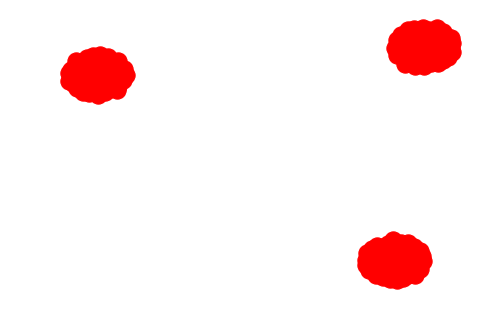

In [8]:
#1将鸢尾花数据集画成图
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
for i in range(n):
    for j in range(i+1,n):
        if(aj[i][j]==1):
            G.add_edge(i,j)
nx.draw(G)
plt.show()

In [10]:
#3带权邻接矩阵aj1
import numpy as np
n = data.shape[0]
m = data.shape[1]
aj1 = np.zeros([n,n])
for i in range(n):
    for j in range(n):
        for k in range(m):
            distance = abs(data[i][k]-data[j][k])
            aj1[i][j] = aj1[i][j] + distance
print(aj1)

[[0.  0.7 0.8 ... 7.5 7.3 6.6]
 [0.7 0.  0.5 ... 7.2 7.8 6.3]
 [0.8 0.5 0.  ... 7.7 7.9 6.8]
 ...
 [7.5 7.2 7.7 ... 0.  1.2 0.9]
 [7.3 7.8 7.9 ... 1.2 0.  1.5]
 [6.6 6.3 6.8 ... 0.9 1.5 0. ]]


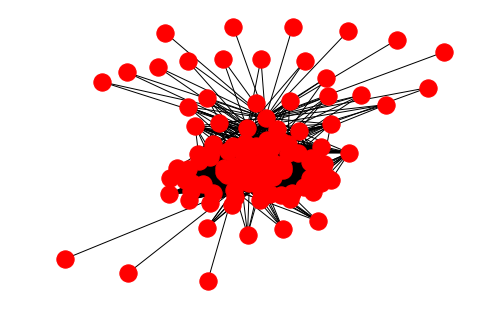

In [17]:
#2
G1 = nx.Graph()
for i in range(n):
    for j in range(i+1,n):
        if(aj1[i][j]>7.5):
            G1.add_edge(i,j)
nx.draw(G1)
plt.show()

In [18]:
#4根据邻接矩阵进行聚类

In [25]:
#距离矩阵
def distance(x1, x2, sqrt_flag=False):
    res = np.sum((x1-x2)**2)
    if sqrt_flag:
        res = np.sqrt(res)
    return res

In [20]:
#邻接矩阵
def myKNN(S, k, sigma=1.0):
    N = len(S)
    A = np.zeros((N,N))
    for i in range(N):
        dist_with_index = zip(S[i], range(N))
        dist_with_index = sorted(dist_with_index, key=lambda x:x[0])
        neighbours_id = [dist_with_index[m][1] for m in range(k+1)]
        for j in neighbours_id: # xj is xi's neighbour
            A[i][j] = np.exp(-S[i][j]/2/sigma/sigma)
            A[j][i] = A[i][j] # mutually
    return A

In [21]:
#标准化拉普拉斯矩阵
def calLaplacianMatrix(adjacentMatrix):

    # compute the Degree Matrix: D=sum(A)
    degreeMatrix = np.sum(adjacentMatrix, axis=1)
    # compute the Laplacian Matrix: L=D-A
    laplacianMatrix = np.diag(degreeMatrix) - adjacentMatrix
    # normailze
    # D^(-1/2) L D^(-1/2)
    sqrtDegreeMatrix = np.diag(1.0 / (degreeMatrix ** (0.5)))
    return np.dot(np.dot(sqrtDegreeMatrix, laplacianMatrix), sqrtDegreeMatrix)